In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
df0 = pd.read_csv('걷기/KS_FCC_WALK_INFO_202110.csv')
df0

,MBER_AGE_CO,SEXDSTN_FLAG_CD,WEEK_ODR,DALY_ODR,PACE_CO,CNSUM_CAL
0,10,M,WK_03,3,12314.0,0
1,10,M,WK_03,2,12927.0,0
2,10,M,WK_04,6,19818.0,0
3,10,M,WK_03,1,9890.0,0
4,10,M,WK_01,7,12404.0,0
...,...,...,...,...,...,...
924846,87,F,WK_02,4,8384.0,0
924847,87,F,WK_03,2,1425.0,0
924848,87,F,WK_03,1,199.0,0
924849,87,F,WK_02,7,349.0,0


In [3]:
df = df0[['MBER_AGE_CO', 'SEXDSTN_FLAG_CD', 'PACE_CO']]
df['AGE_CAT'] = 1

In [4]:
index1 = df[['PACE_CO']].dropna(axis=0).index
df = df.loc[index1]
df

,MBER_AGE_CO,SEXDSTN_FLAG_CD,PACE_CO,AGE_CAT
0,10,M,12314.0,1
1,10,M,12927.0,1
2,10,M,19818.0,1
3,10,M,9890.0,1
4,10,M,12404.0,1
...,...,...,...,...
924846,87,F,8384.0,1
924847,87,F,1425.0,1
924848,87,F,199.0,1
924849,87,F,349.0,1


In [5]:
# for i in range(len(df)):
#     df['AGE_CAT'][i] = df['MBER_AGE_CO'][i]

In [6]:
def category_age(x):
    if x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    elif x < 90:
        return 8
    else:
        return 9

In [7]:
df['AGE_CAT'] = df['MBER_AGE_CO'].apply(category_age)

In [8]:
df

,MBER_AGE_CO,SEXDSTN_FLAG_CD,PACE_CO,AGE_CAT
0,10,M,12314.0,1
1,10,M,12927.0,1
2,10,M,19818.0,1
3,10,M,9890.0,1
4,10,M,12404.0,1
...,...,...,...,...
924846,87,F,8384.0,8
924847,87,F,1425.0,8
924848,87,F,199.0,8
924849,87,F,349.0,8


In [9]:
df = df.drop(['MBER_AGE_CO'], axis=1)

In [28]:
df00

,sex,walk_cnt,age
0,M,12314,1
1,M,12927,1
2,M,19818,1
3,M,9890,1
4,M,12404,1
...,...,...,...
924846,F,8384,8
924847,F,1425,8
924848,F,199,8
924849,F,349,8


In [27]:
df00.to_csv('walk_enc_cp_new.csv', encoding='cp949')

In [11]:
df.columns = ['sex', 'walk_cnt', 'age']

In [12]:
df.isnull().sum()

sex         0
walk_cnt    0
age         0
dtype: int64

In [13]:
# df.to_csv('walk_enc.csv', encoding='utf-8')
# df.to_csv('walk.csv')


In [13]:
df['walk_cnt'] = df['walk_cnt'].astype(int)
df

,sex,walk_cnt,age
0,M,12314,1
1,M,12927,1
2,M,19818,1
3,M,9890,1
4,M,12404,1
...,...,...,...
924846,F,8384,8
924847,F,1425,8
924848,F,199,8
924849,F,349,8


In [14]:
def graph_data(df, age, sex):
    condition = (df.age == age) & (df.sex == sex)
    return df[condition]

In [15]:
df1 = graph_data(df, 2, 'M')
df1

,sex,walk_cnt,age
3687,M,30,2
3731,M,8314,2
3733,M,9414,2
3734,M,5269,2
3735,M,21993,2
...,...,...,...
50010,M,5097,2
50011,M,8557,2
50012,M,8523,2
50013,M,8600,2


In [16]:
df['walk_cnt'].mean()

10962.983783988693

In [17]:
zero_idx = df[df['walk_cnt'] == 0].index
df0 = df.drop(zero_idx, axis=0)
df0

,sex,walk_cnt,age
0,M,12314,1
1,M,12927,1
2,M,19818,1
3,M,9890,1
4,M,12404,1
...,...,...,...
924846,F,8384,8
924847,F,1425,8
924848,F,199,8
924849,F,349,8


c:\users\home\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



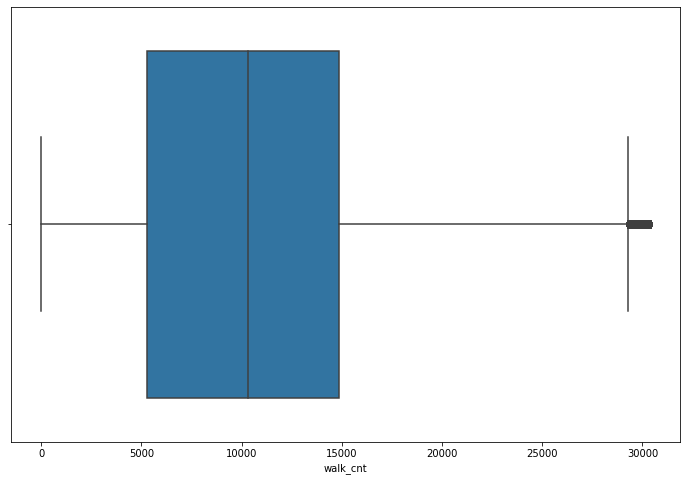

In [30]:
# 이상치 장난아님
plt.figure(figsize=(12,8))
sns.boxplot(df00['walk_cnt'])
plt.show()

In [19]:
quartile_1 = df0['walk_cnt'].quantile(0.25)
quartile_3 = df0['walk_cnt'].quantile(0.75)
IQR = quartile_3 - quartile_1

In [20]:
out_df = df0[(df0['walk_cnt'] < (quartile_1 - 1.5 * IQR)) | (df0['walk_cnt'] > (quartile_3 + 1.5 * IQR))]
out_df

,sex,walk_cnt,age
113,M,134205,1
114,M,115370,1
123,M,129720,1
127,M,129720,1
135,M,115370,1
...,...,...,...
923944,F,33839,8
923945,F,32797,8
924153,M,170481,8
924238,M,41259,8


In [21]:
df00 = df0.drop(out_df.index, axis=0)
df00

,sex,walk_cnt,age
0,M,12314,1
1,M,12927,1
2,M,19818,1
3,M,9890,1
4,M,12404,1
...,...,...,...
924846,F,8384,8
924847,F,1425,8
924848,F,199,8
924849,F,349,8


In [23]:
df00.mean()

C:\Users\HOME\AppData\Local\Temp/ipykernel_16672/1506771723.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



walk_cnt    10739.637862
age             4.337638
dtype: float64

In [22]:
zero_idx = df0[df0['walk_cnt'] == 0].index
df00 = df0.drop(zero_idx, axis=0)
df00

,sex,walk_cnt,age
0,M,12314,1
1,M,12927,1
2,M,19818,1
3,M,9890,1
4,M,12404,1
...,...,...,...
924846,F,8384,8
924847,F,1425,8
924848,F,199,8
924849,F,349,8


In [25]:
df01 = graph_data(df00, 2, 'M')
df01

,sex,walk_cnt,age
3687,M,30,2
3731,M,8314,2
3733,M,9414,2
3734,M,5269,2
3735,M,21993,2
...,...,...,...
50010,M,5097,2
50011,M,8557,2
50012,M,8523,2
50013,M,8600,2


In [26]:
df01.mean()

C:\Users\HOME\AppData\Local\Temp/ipykernel_19512/1720547959.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



walk_cnt    9167.232784
age            2.000000
dtype: float64

In [55]:
fig = px.histogram(df01[['walk_cnt']],
) # or violin, rug
fig.show()

In [33]:
df01['walk_cnt']

3667     12622
3668      7263
3669      7210
3670     19032
3671      6482
         ...  
50062    16425
50063    21519
50064     9338
50065     9056
50066     2757
Name: walk_cnt, Length: 19030, dtype: int32

In [60]:
lst = list(df01['walk_cnt'])
fig = ff.create_distplot([lst],['dd'],
    bin_size=1000, show_rug=False)
fig.show()

c:\users\home\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



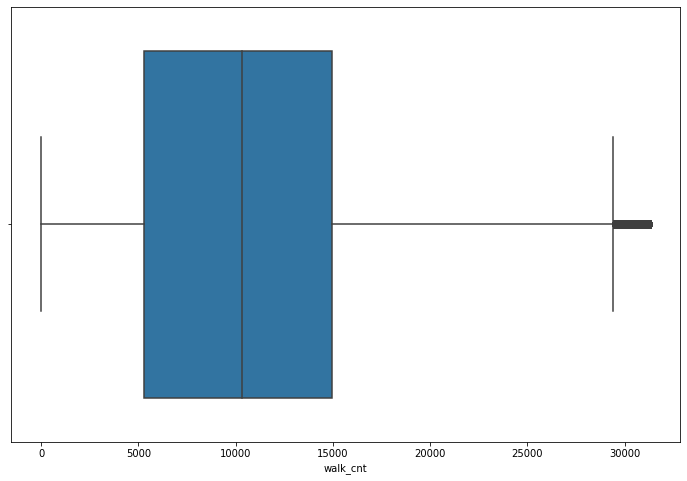

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(df00['walk_cnt'])
plt.show()

<AxesSubplot:xlabel='walk_cnt', ylabel='Density'>

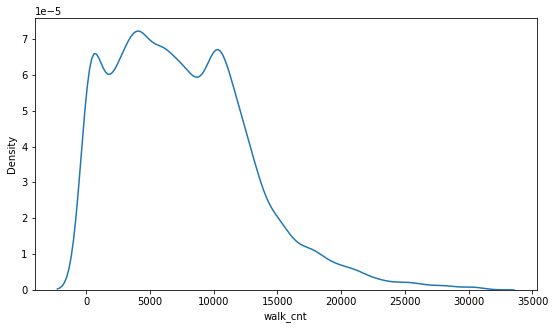

In [26]:
data = df01['walk_cnt']
f, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(data, ax=ax)

In [28]:
df01.describe()

,walk_cnt,age
count,19030.000000,19030.0
mean,7575.508355,2.0
std,5393.989449,0.0
min,1.000000,2.0
25%,3404.250000,2.0
50%,6966.500000,2.0
75%,10830.750000,2.0
max,31292.000000,2.0


In [30]:
lst = list(df01['walk_cnt'])
fig = ff.create_distplot([lst], ['distplot'], show_hist=False, curve_type='kde')
fig.show()

In [30]:
df1.describe()

,walk,age
count,28.000000,28.0
mean,8554.178571,2.0
std,534.167823,0.0
min,7932.000000,2.0
25%,8231.500000,2.0
50%,8496.500000,2.0
75%,8686.250000,2.0
max,10827.000000,2.0


In [ ]:
def category_walk(x):
    if x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    elif x < 90:
        return 8
    else:
        return 9

<AxesSubplot:xlabel='walk_cnt', ylabel='Density'>

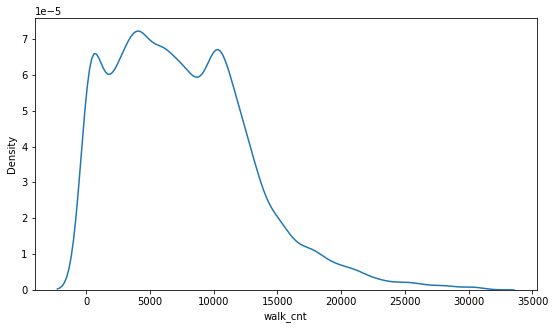

In [27]:
data = df1['walk']
f, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(data, ax=ax)

In [25]:
from sklearn.neighbors import KernelDensity

In [26]:
estimator = KernelDensity(kernel='gaussian')
estimator.fit(data)

ValueError: Expected 2D array, got 1D array instead:
array=[4439. 4657. 4161. 3655. 5922. 4196. 3271. 3629. 3704. 3051. 3520. 3745.
 3629. 4164. 3815. 3725. 3022. 2720. 2856. 3427. 5036. 5542. 4108. 4971.
 3602. 4553. 4864. 5889.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
df00 = pd.read_csv('걷기/KS_FCC_WALK_INFO_202109.csv')
df00

,MBER_AGE_CO,SEXDSTN_FLAG_CD,WEEK_ODR,DALY_ODR,PACE_CO,CNSUM_CAL
0,10,M,WK_04,2,11825.0,0
1,10,M,WK_02,7,10385.0,0
2,10,M,WK_02,6,15143.0,0
3,10,M,WK_02,5,9345.0,0
4,10,M,WK_02,4,11710.0,0
...,...,...,...,...,...,...
857696,87,F,WK_02,5,117.0,0
857697,87,F,WK_02,6,62.0,0
857698,87,F,WK_01,6,1570.0,0
857699,87,F,WK_03,7,306.0,0


In [ ]:
df